# Mínimos Quadrados em Julia
> Nome: Davi dos Santos Mattos
> DRE: 119133049

## Exercício 3.1

### 1. Gerando 30 pontos para um polinômio de grau 5:
Uma função de grau 5 tem a seguinte cara: 
$f(x) = a_1 x^5 + a_2 x^4 + a_3 x^3 + a_4 x^2 + a_5 x + a_6$

Vamos utilizar o polinômio de grau 5 mais simples: $f(x) = x^5 -2 x^4  + 2 x^2 + x$

ou seja, tomando a matriz de coeficientes como $[1,  -2,   0,   2,   1,   0]$


In [60]:
function f(x)
    coef = [1   -2   0   2   1   0] #definindo os coeficientes da função
    y = coef[1].* x .^5 .+ coef[2].* x.^4 .+ coef[3].* x.^3 .+ coef[4].*x.^2 .+ coef[5] .* x .+ coef[6] #calculando a função
    return y
end

using Random
Random.seed!(14) #Garantindo que todos os número gerado sejam gerados apenas uma vez

x = transpose(rand(-2.5:0.1:3,1,30))
#ruido = randn(length(x)) .* rand()^rand()
y = f(x) #.+ ruido

30×1 Matrix{Float64}:
  10.0
  -0.15625
  16.565120000000007
   3.46875
  -0.36827
   0.6790400000000001
  34.53125
 -58.0
 -20.072960000000005
  27.191039999999983
   ⋮
  -1.18269
  83.37528999999995
  -0.15625
   6.180480000000002
   0.11981000000000001
   3.015039999999999
  -0.08021
   0.6790400000000001
   1.36787

Para evitar overflow por conta de número extremamente grandes, ou extremamente pequenos, vamos escolher aleatóriamente 30 números dentro do intervalo $[-2.5,3]$, a cada $0.1$ unidade, rodando o código obtivemos os seguitnes pontos gerados

In [58]:
for (xi, yi) in zip(x, y)
    @show xi, yi
end

(xi, yi) = (1.9, 7.816789999999999)
(xi, yi) = (-0.8, -0.6668800000000001)
(xi, yi) = (2.1, 12.864810000000004)
(xi, yi) = (1.3, 2.6807300000000005)
(xi, yi) = (-1.1, -3.2187100000000015)
(xi, yi) = (0.2, 0.27712000000000003)
(xi, yi) = (2.5, 34.53125)
(xi, yi) = (-2.5, -165.78125)
(xi, yi) = (-2.0, -58.0)
(xi, yi) = (2.3, 21.275229999999997)
(xi, yi) = (-2.5, -165.78125)
(xi, yi) = (-0.3, -0.13863)
(xi, yi) = (0.7, 1.36787)
(xi, yi) = (0.5, 0.90625)
(xi, yi) = (-2.5, -165.78125)
(xi, yi) = (-1.5, -14.71875)
(xi, yi) = (-1.4, -10.541439999999998)
(xi, yi) = (2.5, 34.53125)
(xi, yi) = (1.3, 2.6807300000000005)
(xi, yi) = (-1.0, -2.0)
(xi, yi) = (2.9, 83.37528999999995)
(xi, yi) = (-1.3, -7.345130000000002)
(xi, yi) = (2.9, 83.37528999999995)
(xi, yi) = (-0.8, -0.6668800000000001)
(xi, yi) = (1.7, 4.974370000000001)
(xi, yi) = (-0.2, -0.12351999999999999)
(xi, yi) = (1.3, 2.6807300000000005)
(xi, yi) = (-0.4, -0.14143999999999995)
(xi, yi) = (0.2, 0.27712000000000003)
(xi, yi) = (0.5, 0.

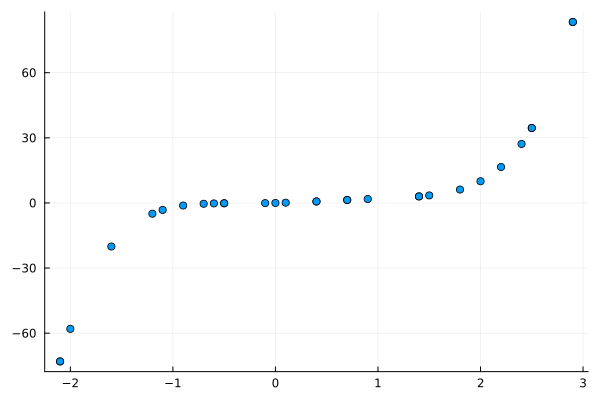

In [61]:
using Plots

gr(size = (600,400))
plot(rand(3),rand(3))
scatter!(rand(3),rand(3))
nothing

scatter(x,y, leg=false)

### 2. Regressão polinomial com polinômio de grau 0 até 29

In [36]:
using LinearAlgebra

function mq(x, y, F)
    n = length(x)
    p = length(F)
    M = zeros(p,p)
    c = zeros(p)
    for j in 1:p
        for k in 1:p
            M[j,k] = sum( F[j](x[i]) * F[k](x[i]) for i in 1:n)
        end
        c[j]= sum(y[i] * F[j](x[i]) for i in 1:n)
    end
    A = M \ c
    h(x) = sum(F[j](x) * A[j] for j in 1:p)
    return A, h
end

function regressao(graus)
    vetor_erro = []  
    for grau in 0:graus
        F = [x -> x^j for j in 0:grau]
        A, modelo = mq(x, y, F)
        r = y - modelo.(x)
        sqr = norm(r)^2
        push!(vetor_erro, sqr)
        println("Grau: $grau - Erro: $sqr")
    end
    return vetor_erro
end

graus=29
erros = regressao(graus)


Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

30-element Vector{Any}:
 18150.12168075093
  6585.677236995198
  4169.682497975304
   499.30817916896325
   193.89505960319036
     5.2220182690692997e-23
     4.154635247981037e-22
     1.2969781443061203e-21
     2.877683244593473e-21
     3.505983972268059e-20
     ⋮
     1.250649861277679e-10
     4.046645413293742e-9
     2.288829100748234e-11
     1.0498726984132813e-9
     2.252579775903048e-9
     3.380247012249825e-11
     7.746773325859718e-11
     1.071914052707664e-10
     5.004194906435203e-11

## 3.1.3

É possivel sim, realizar regressão com polinômio de grau maior que 29, porém depende de o quão grande o grau desse polinômio é, poois a partir de certo grau o custo computacional se torna muito alto e no Julia, o código tende a rodar por alguns minutos e retornar com um erro, mas podemos também observar que o erro começa a oscilar muito, o que indica fortemente que o problema ja foi resolvido e está instável.

In [37]:
#=
calculando o erro da regressao de polinomios até grau 500
=#
graus = 40
erro = regressao(graus)


Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

41-element Vector{Any}:
 18150.12168075093
  6585.677236995198
  4169.682497975304
   499.30817916896325
   193.89505960319036
     5.2220182690692997e-23
     4.154635247981037e-22
     1.2969781443061203e-21
     2.877683244593473e-21
     3.505983972268059e-20
     ⋮
     8.788328011346161e-10
     2.802624403570957e-10
     3.0724960312792633e-10
     1.3360621016995522e-11
     1.1540105260374117e-11
     1.9556483788584052e-11
     2.4980451893653936e-10
     1.8859751884212426e-7
     8.639813689293411e-12

## 3.1.4

Conforme fazemos a regressão até achar a melhor curva, podemos notar que o erro diminui drásticamente, atingindo seu mínimo exatamente no grau da curva que mais se aproxima, e quando passamos da melhor curva, ou seja, aumentamos o grau, notamos que o erro aumenta mas continua muito pequeno, e oscilando. Ao plotar o gráfico do erros, mal podemos notar a diferença, como se a partir de determinado grau, o erro fosse constante (analisando somente pelo gráfico) 

In [40]:
#=
graus = 29
erros = []

for grau in 0:graus
    F = [x -> x^j for j in 0:grau]
    A, modelo = mq(x, y, F)
    r = y - modelo.(x)
    sqr = norm(r)^2
    push!(erros, sqr)
    println("Grau: $grau - Erro: $sqr")
end
=#

graus = 29
erros = regressao(graus)

Grau: 0 - Erro: 18150.12168075093
Grau: 1 - Erro: 6585.677236995198
Grau: 2 - Erro: 4169.682497975304
Grau: 3 - Erro: 499.30817916896325
Grau: 4 - Erro: 193.89505960319036
Grau: 5 - Erro: 5.2220182690692997e-23
Grau: 6 - Erro: 4.154635247981037e-22
Grau: 7 - Erro: 1.2969781443061203e-21
Grau: 8 - Erro: 2.877683244593473e-21
Grau: 9 - Erro: 3.505983972268059e-20
Grau: 10 - Erro: 3.1371418865383906e-18
Grau: 11 - Erro: 1.5718308953689274e-17
Grau: 12 - Erro: 1.628491751197549e-16
Grau: 13 - Erro: 1.1345703918564367e-14
Grau: 14 - Erro: 2.4999961439381716e-13
Grau: 15 - Erro: 3.674633926168179e-12
Grau: 16 - Erro: 6.523809264045365e-12
Grau: 17 - Erro: 1.7029877568844503e-11
Grau: 18 - Erro: 2.2354977634995093e-10
Grau: 19 - Erro: 1.2506060182862142e-10
Grau: 20 - Erro: 3.684133287835922e-12
Grau: 21 - Erro: 1.250649861277679e-10
Grau: 22 - Erro: 4.046645413293742e-9
Grau: 23 - Erro: 2.288829100748234e-11
Grau: 24 - Erro: 1.0498726984132813e-9
Grau: 25 - Erro: 2.252579775903048e-9
Grau: 2

30-element Vector{Any}:
 18150.12168075093
  6585.677236995198
  4169.682497975304
   499.30817916896325
   193.89505960319036
     5.2220182690692997e-23
     4.154635247981037e-22
     1.2969781443061203e-21
     2.877683244593473e-21
     3.505983972268059e-20
     ⋮
     1.250649861277679e-10
     4.046645413293742e-9
     2.288829100748234e-11
     1.0498726984132813e-9
     2.252579775903048e-9
     3.380247012249825e-11
     7.746773325859718e-11
     1.071914052707664e-10
     5.004194906435203e-11

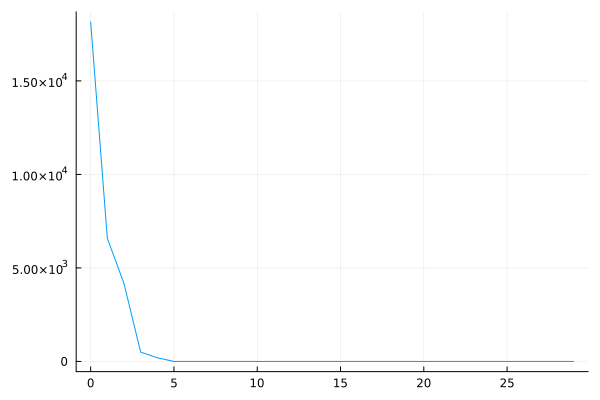

In [41]:

using Plots
plot(0:graus, erros,legend=false)



Observando o gráfico acima, podemos perceber que a medida que o grau do polinômio aumenta, o erro tende a 0. O que por sua vez é o esperado, pois quando utilizamos mínimos quadrados para tentar achar uma curva que melhor se aproxima dos pontos, nós estamos, na verdade diminuindo o erro. 

## 3.2  Ranking dos Filmes

Para resolver esse problema utilizando mínimos quadrados, primeiros temos que modelar esse problema para ficar parecido com $Ax=b$, para isso vamos definir a seguinte relação para cada comparação $$Filme1 - Filme2 = DiferençaDeVotos$$
Com isso temos uma matriz $A_{Qtd_Comparações\times Filmes}$, onde cada elemento da matriz será $1$ ou $-1$, representado quais filmes foram comparados, $x_i$ = Representa cada filme individualmente e por fim $b$ = diferença de votos.

Com isso, utilizando MQ nesse modelo, teremos um vetor $x$ aproximado que irá representar o quando cada filme é preferido, ou não.

In [42]:
using LinearAlgebra

filmes = [
    "Toy Story",
    "Rocky",
    "De Volta pro Futuro",
    "Curtindo a Vida Adoidado",
    "Os Incríveis",
    "Duna",
    "Batman Begins",
    "Harry Potter 1",
    "Shrek"
]

comparacoes = [
    ("Toy Story", "Rocky", 11),
    ("De Volta pro Futuro", "Curtindo a Vida Adoidado", 3),
    ("Os Incríveis", "Duna", 7),
    ("Batman Begins", "Harry Potter 1", 2),
    ("Shrek", "Duna", 9),
    ("Harry Potter 1", "Rocky", 7),
    ("Toy Story", "De Volta pro Futuro", 5),
    ("Os Incríveis", "Harry Potter 1", 5),
    ("Curtindo a Vida Adoidado", "Duna", 2),
    ("De Volta pro Futuro", "Duna", 2),
    ("Shrek", "Rocky", 11),
    ("Os Incríveis", "Batman Begins", 5),
    ("Toy Story", "Batman Begins", 3),
    ("Os Incríveis", "Curtindo a Vida Adoidado", 7)
]

# Montar matriz A e vetor b
A = zeros(length(comparacoes), length(filmes))
b = zeros(length(comparacoes))

for (i, (f1, f2, diff)) in enumerate(comparacoes)
    Filme1 = findfirst(==(f1), filmes)
    Filme2 = findfirst(==(f2), filmes)
    A[i, Filme1] = 1
    A[i, Filme2] = -1
    b[i] = diff
end

# Resolver por mínimos quadrados
s = A \ b

ranking = []
for i in 1:length(s)
    push!(ranking, (filmes[i], s[i]))
end

sort!(ranking, by = tupla -> tupla[2], rev=true)




9-element Vector{Any}:
 ("Shrek", 4.825605452111475)
 ("Os Incríveis", 4.5342582451016185)
 ("Toy Story", 4.043568212242912)
 ("Batman Begins", 0.6711695265912132)
 ("Harry Potter 1", -0.5643178775708901)
 ("De Volta pro Futuro", -0.642083485456979)
 ("Curtindo a Vida Adoidado", -2.5194109772423037)
 ("Duna", -3.450407691371546)
 ("Rocky", -6.898381404405501)

Após aplicar MQ no problema chegamos neste ranking acima, com Shrek sendo o filme mais preferido e Rocky sendo o filme menos preferido.

Analisando esse ranking, conseguimos ver alguns padrão, aparentemente animações são mais preferidas que filmes live-action, filmes de Ficção com heróis e/ou fantasia tem mais preferência do que filmes com com drama sendo gênero principal. Filmes com faixa etária "Livre" tem mais preferçencia que os demais.

## 3.4


Como queremos achar o dia em que o peso vai atingir 110kg, queremos achar uma $f(t)=110$, sendo t o dia em que o peso atingiu 110kg, a planilha contém apenas $2$ colunas com $n$ linhas, tendo uma relação clara de Data $\times$ Peso. Porém para conseguir achar uma $t$ é preciso converter a coluna das datas para um valor numérico, com isso vamos fazer uma sequência $[1,2,3,4,..., n]$, onde cada elemento desse vetor representa o número do dia desde que começou a medição. Com isso, é necessário a se atentar os dias em que não houve medição

In [43]:
# Carregando dados no Julia

using CSV, DataFrames
dir = "Pesagem.csv"
df_pesagem = CSV.read(dir, DataFrame)
println(first(df_pesagem, 5))

5×2 DataFrame
 Row │ Data     Peso (kg) 
     │ String7  Float64   
─────┼────────────────────
   1 │ 26/10        120.6
   2 │ 27/10        121.6
   3 │ 28/10        120.8
   4 │ 29/10        121.4
   5 │ 30/10        121.1


Separando as colulas em duas variáveis, `datas` e `pesos` e convertendo datas para um sequência numérica de dias.

In [44]:

datas = df_pesagem[!,"Data"]
pesos = df_pesagem[!,"Peso (kg)"]

using Dates
ano = 2024
novo_ano = ano + 1 

data_dias = Date[]
for data in datas
    partes = split(data, '/')
    dia_num = parse(Int, partes[1])
    mes_num = parse(Int, partes[2]) 
    ano_final = (mes_num >= 10) ? ano : novo_ano 
    push!(data_dias, Date(ano_final, mes_num, dia_num))
end

println(data_dias)

dias = Dates.value.(data_dias .- data_dias[1]) .+1


[Date("2024-10-26"), Date("2024-10-27"), Date("2024-10-28"), Date("2024-10-29"), Date("2024-10-30"), Date("2024-11-05"), Date("2024-11-06"), Date("2024-11-07"), Date("2024-11-08"), Date("2024-11-09"), Date("2024-11-10"), Date("2024-11-11"), Date("2024-11-12"), Date("2024-11-13"), Date("2024-11-14"), Date("2024-11-15"), Date("2024-11-16"), Date("2024-11-17"), Date("2024-11-18"), Date("2024-11-19"), Date("2024-11-20"), Date("2024-11-21"), Date("2024-11-22"), Date("2024-11-23"), Date("2024-11-24"), Date("2024-11-25"), Date("2024-11-26"), Date("2024-11-27"), Date("2024-11-28"), Date("2024-11-29"), Date("2024-11-30"), Date("2024-12-01"), Date("2024-12-02"), Date("2024-12-03"), Date("2024-12-04"), Date("2024-12-05"), Date("2024-12-06"), Date("2024-12-07"), Date("2024-12-08"), Date("2024-12-09"), Date("2024-12-10"), Date("2024-12-13"), Date("2024-12-15"), Date("2024-12-17"), Date("2024-12-18"), Date("2024-12-19"), Date("2024-12-20"), Date("2024-12-21"), Date("2024-12-22"), Date("2024-12-23"),

69-element Vector{Int64}:
  1
  2
  3
  4
  5
 11
 12
 13
 14
 15
  ⋮
 75
 77
 78
 79
 80
 81
 82
 83
 84

Plotando os dados e vendo qual curva melhor de ajusta aos dados, após rodar o cálculo do erro para polinômios de grau até 20, e analisar os valores dos erros, vemos que o polinômio de grau 4 é o que melhor se ajusta, pois ao calcular o erro de um polinômio de grau 5 o erro volta a subir e a ficar instável, indicando que já passamos da melhor aproximação

Grau: 0 - Erro: 197.10637681159432
Grau: 1 - Erro: 25.49439822250021
Grau: 2 - Erro: 24.825799002220613
Grau: 3 - Erro: 24.813810723940755
Grau: 4 - Erro: 22.368671267361087
Grau: 5 - Erro: 22.36873300036381
Grau: 6 - Erro: 24.826707928695757
Grau: 7 - Erro: 24.851598467364784
Grau: 8 - Erro: 26.656570639503673
Grau: 9 - Erro: 2821.096912681138
Grau: 10 - Erro: 2.6454199618009383e33
Grau: 11 - Erro: 8.516905580106533e41
Grau: 12 - Erro: 3.4498376581805187e41
Grau: 13 - Erro: 3.746710594444254e43
Grau: 14 - Erro: 7.160700310233095e43
Grau: 15 - Erro: 3.556520795480622e45
Grau: 16 - Erro: 1.2306043451724694e44
Grau: 17 - Erro: 4.948521911132999e44
Grau: 18 - Erro: 6.746388553487663e44
Grau: 19 - Erro: 3.4712321836770876e44
Grau: 20 - Erro: 1.5404135576447224e45


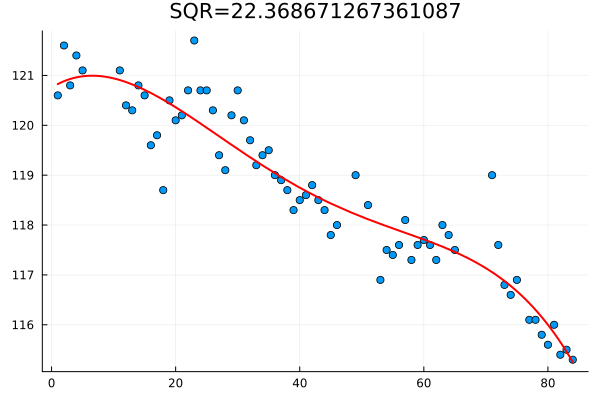

In [48]:
using Plots
scatter(datas, pesos,
        xlabel="Dias", 
        ylabel="Peso (kg)",
        leg=false)
x = dias
y = pesos

scatter(x, y, leg=false)

grau = 20
erro = regressao(grau) ## Vendo qual grau apresenta menor erro

F = [x -> x^j for j in 0:4] ## Vendo se o grau com menor erro escolhido é o que melhor de ajusta visualmente
A, modelo = mq(x,y, F)
r = y - modelo.(x)
sqr = norm(r)^2


plot!(modelo, extrema(x)..., c=:red, lw=2)
title!("SQR=$sqr")

Uma vez feita a interpolação, bastar pegar o modelo e resolver $modelo(t) =110$ para $t$, ou seja $modelo(t) - 110 =0$, achar os zeros da função e em seguida converter de volta para uma Data.

In [49]:
using Roots 

peso_alvo_kg = 110.0
funcao_objetivo(t) = modelo(t) - peso_alvo_kg

dia_inicial_busca_raiz = maximum(dias)
dia_final_busca_raiz = maximum(dias) + 365 

raizes_t = find_zeros(funcao_objetivo, dia_inicial_busca_raiz, dia_final_busca_raiz)

println(raizes_t)


previsao = minimum(filter(t -> t >= dia_inicial_busca_raiz, raizes_t)) 
dias_para_adicionar = floor(Int, previsao) 
data_prevista = data_dias[1] .+ Day(dias_para_adicionar)

println(data_prevista)


[98.79632765923427]
2025-02-01


Usando julia para calcular os zeros da função, achamos a quantidade de dias que levará do dia 1 até o dia t, para atingir o peso alvo, ou seja, $\approx 98.79632765923427$ dias, usando julia para converter de volta para data, obtemos a seguinte data $$ 01/02/2025$$

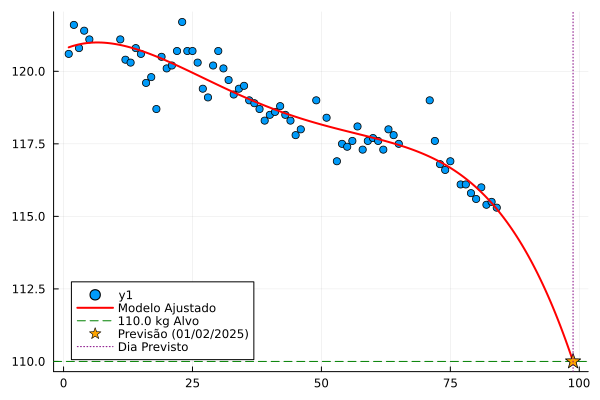

In [50]:

plot_pesagem = scatter(
    dias, 
    pesos,
    legend=:bottomleft
)

max_dia_plot = max(maximum(dias), maximum(previsao))

dias_para_curva_modelo = range(minimum(dias), stop=max_dia_plot, length=200)

plot!(plot_pesagem, # Adiciona ao plot existente
    dias_para_curva_modelo, 
    modelo.(dias_para_curva_modelo), # Aplica a função modelo a cada dia
    label="Modelo Ajustado",
    linewidth=2,
    color=:red
)

hline!(plot_pesagem,
    [peso_alvo_kg], 
    label="$(peso_alvo_kg) kg Alvo", 
    linestyle=:dash, 
    color=:green
)

scatter!(plot_pesagem,
    [previsao], 
    [peso_alvo_kg], 
    label="Previsão ($(Dates.format(data_prevista, "dd/mm/yyyy")))",
    markersize=8,
    marker=:star5,
    color=:orange
)
vline!(plot_pesagem, 
    [previsao], 
    label="Dia Previsto",
    linestyle=:dot, 
    color=:purple)




Usuando a plotagem de gráficos pra ter uma representação visual, podemos ver que o valor de $t$ que buscamos se encontra bem próximo de 100, o que leva a crer que achamos o valor certo.

## 3.4

Analisando o problemas temos os seguintes dados

| Horário | Valor |
|--------:|------:|
| 15:35   |  600  |
| 15:36   | 1400  |
| 15:38   | 3200  |


$f(t) = 3^{c_1 * tempo} + 500$

Queremos um $t$ que $$f(t)=24700$$

Antes de mais nada vamos tomar $t$ = minutos, e assumir que a postagem foi feita 15:35, então a nossa tabela de dados passa ser
| t em minutos | Valor |
|--------:|------:|
| 0   |  600  |
| 1   | 1400  |
| 3   | 3200  |

Vamos lineazirar os dados e a função

$$
    y = 3^{c_1 * t} + 500 \\
    y - 500 = 3^{c_1 * t} \\
    \log_3(y - 500) = \log_3 (3^{c_1 * t}) \\
    \log_3(y - 500) = c_1 \cdot t
$$

Com isso temos o seguinte dicionário

$$
\overline{y} = \log_3(y - 500) \\
\overline{c_1} = c_1 \\
\overline{t} = t
$$

Agora temos que ajustar a nossa tabela de dados inicial para $\overline{y} = \log_3(y - 500)$ e $\overline{t} = t$

In [73]:
t = [0 1 3]'
y = [600 1400 3200]'

y_barra = log.(y .- 500) ./ log(3)

nova_tabela = [t y_barra]


3×2 Matrix{Float64}:
 0.0  4.19181
 1.0  6.19181
 3.0  7.19181

Agora basta resolver o sistema $c_1 x = \overline{y}$

In [93]:
c = t \ y_barra

1×1 Matrix{Float64}:
 2.7767226194315064

Achamos o valor de $c = 2.7767226194315064$

Com isso nosso modelo inicial fica $y = 3^{2.7767226194315064 \cdot t} + 500$

agora queremos achar $f(t)=24700$
$$
24700 = 3^{2.7767226194315064 \cdot t} + 500 \\
24200 = 3^{2.7767226194315064 \cdot t} \\
\log_3(24200) = 2.7767226194315064 \cdot t \\
t = \frac{\log_3(24200)}{2.7767226194315064}
$$

In [88]:
alvo = 24700.0
log_y = log(alvo - 500) / log(3)
valor_t = log_val / c[1]

result = 3^(c[1]*valor_t) + 500 #Verificando

println(valor_t,"\n", result)

3.308956002713596
24699.999999999996


Segundo a função $f(t) = 3^{c_1 * tempo} + 500$, levaria aproximadamente um pouco mais de 3 minutos para atingir 24700 tweets sobrea a notícia, porém se olharmos os dados iniciais, em 3 minutos na verdade haveria 3200 tweets

In [103]:
for min in 0:4
    tweets = 3 ^(c[1]*min) + 500
    @show min, tweets
end


(min, tweets) = (0, 501.0)
(min, tweets) = (1, 521.1267834200371)
(min, tweets) = (2, 946.3409776771537)
(min, tweets) = (3, 9929.749166872829)
(min, tweets) = (4, 199720.26835379735)


Calculando $f(t)$ para $t$ de 0 a 4, ou seja, a quantidade de tweets a cada minuto, até 4 minutos

Podemos concluir que, ou modelo utilizado não é o melhor para representar esse crescimento, ou a escolha de tomar 15:35 como minuto 0 para o modelo, não foi a melhor escolha.

## 3.5